# Plotting With Pandas (and matplotlib)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
titanic = pd.read_csv("DataAnalysis/data/titanic.csv")
titanic["age"] = pd.to_numeric(titanic["age"], errors="coerce")

In [7]:
houses = pd.read_csv("DataAnalysis/data/kc_house_data.csv")

In [8]:
ufos = pd.read_csv("DataAnalysis/data/nuforc_reports.csv", parse_dates=['date_time', "posted"])

In [9]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

<AxesSubplot:>

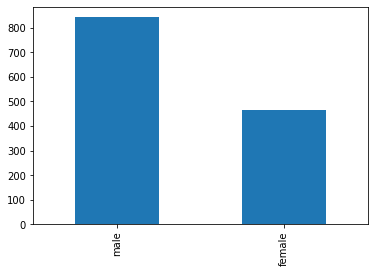

In [10]:
titanic.sex.value_counts().plot(kind="bar")

In [11]:
houses[["sqft_living", "sqft_lot"]].sort_values("sqft_living", ascending=False).head(10)

,sqft_living,sqft_lot
12777,13540,307752
7252,12050,27600
3914,10040,37325
9254,9890,31374
8092,9640,13068
4411,9200,35069
14556,8670,64033
18302,8020,21738
1164,8010,45517
1448,8000,23985


<AxesSubplot:>

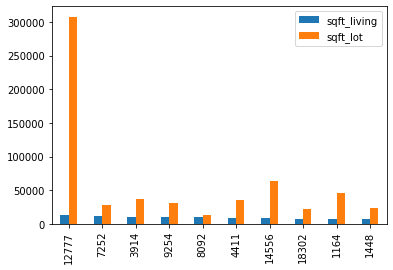

In [12]:
houses[["sqft_living", "sqft_lot"]].sort_values("sqft_living", ascending=False).head(10).plot(kind="bar")

### changing pandas plot style

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [14]:
plt.style.use("fivethirtyeight")

<AxesSubplot:>

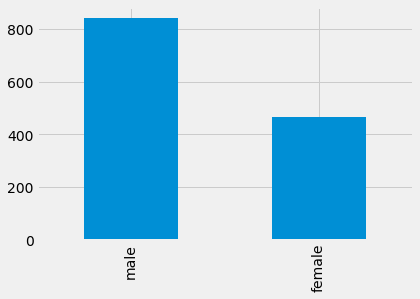

In [15]:
titanic.sex.value_counts().plot(kind="bar")

### adding labels and titles to pandas plots

<AxesSubplot:title={'center':'Sex Breakdown On Titanic'}>

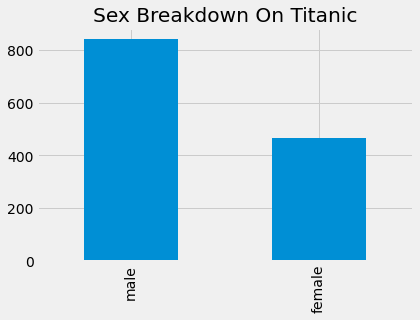

In [16]:
titanic.sex.value_counts().plot(kind="bar", title="Sex Breakdown On Titanic")

Text(1.0, 1.0, 'My Title')

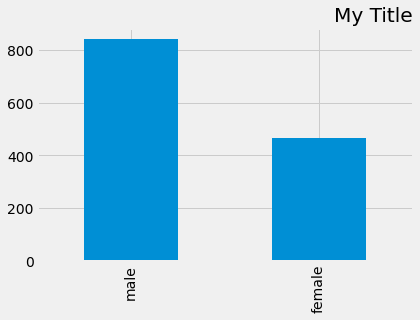

In [17]:
titanic.sex.value_counts().plot(kind="bar")
plt.title("My Title", loc="right")

In [18]:
ufos["month"] = ufos["date_time"].dt.month
ufos["year"] = ufos["date_time"].dt.year

<AxesSubplot:title={'center':'UFO Sightings By Month'}, xlabel='Month', ylabel='Num Sightings'>

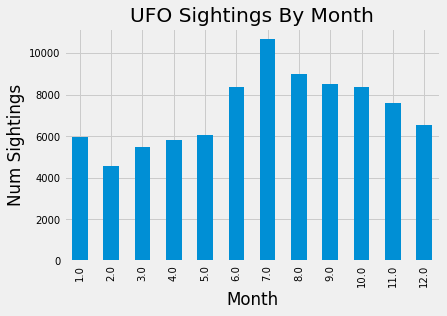

In [19]:
sightings = ufos.month.value_counts().sort_index()
sightings.plot(
    kind="bar", 
    title="UFO Sightings By Month", 
    xlabel="Month",
    ylabel="Num Sightings",
    fontsize="10")

Text(0, 0.5, 'Num Sightings')

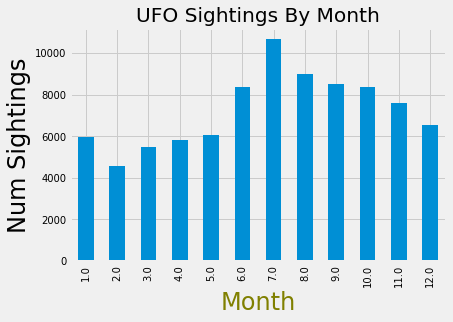

In [20]:
# for more control
sightings = ufos.month.value_counts().sort_index()
sightings.plot(
    kind="bar", 
    title="UFO Sightings By Month", 
    fontsize="10")
plt.xlabel("Month", fontsize=24, color="olive")
plt.ylabel("Num Sightings", fontsize=24)

### using rename() when plotting

In [21]:
sightings

1.0      5979
2.0      4559
3.0      5494
4.0      5817
5.0      6063
6.0      8357
7.0     10682
8.0      8997
9.0      8498
10.0     8371
11.0     7596
12.0     6525
Name: month, dtype: int64

In [22]:
months_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7:"Jul", 8: "Aug", 9:"Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
sightings.rename(months_dict)

Jan     5979
Feb     4559
Mar     5494
Apr     5817
May     6063
Jun     8357
Jul    10682
Aug     8997
Sep     8498
Oct     8371
Nov     7596
Dec     6525
Name: month, dtype: int64

Text(0, 0.5, 'Num Sightings')

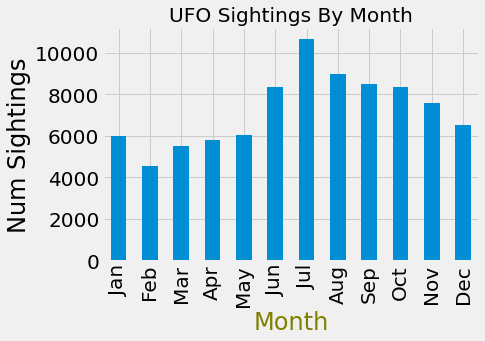

In [23]:
sightings.rename(months_dict).plot(
    kind="bar", 
    title="UFO Sightings By Month", 
    fontsize="20")
plt.xlabel("Month", fontsize=24, color="olive")
plt.ylabel("Num Sightings", fontsize=24)

### pandas bar plot

In [24]:
salaries = pd.read_csv("DataAnalysis/data/Salaries.csv", low_memory=False)

In [25]:
salaries["BasePay"] = pd.to_numeric(salaries["BasePay"], errors="coerce").fillna(0)
salaries["OvertimePay"] = pd.to_numeric(salaries["OvertimePay"], errors="coerce").fillna(0)
salaries["OtherPay"] = pd.to_numeric(salaries["OtherPay"], errors="coerce").fillna(0)

In [26]:
df = salaries[["EmployeeName", "BasePay", "OvertimePay", "OtherPay"]]

In [27]:
df.set_index("EmployeeName", inplace=True)

<AxesSubplot:xlabel='EmployeeName'>

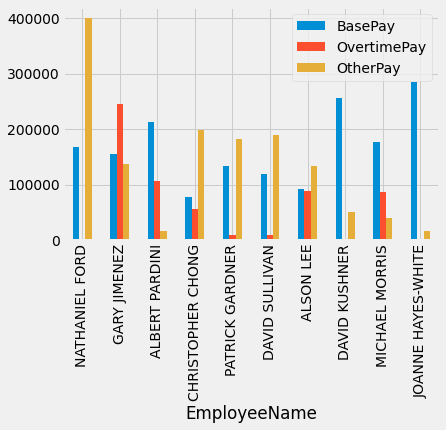

In [28]:
df.head(10).plot(kind="bar")

<AxesSubplot:xlabel='EmployeeName'>

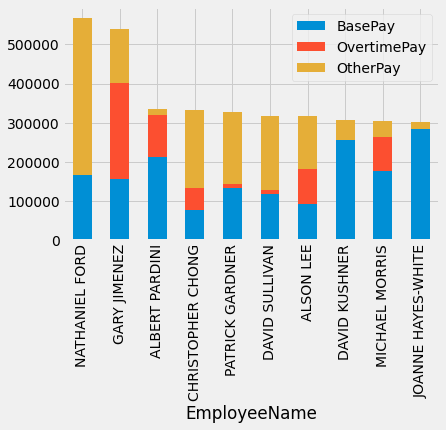

In [29]:
df.head(10).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='EmployeeName'>

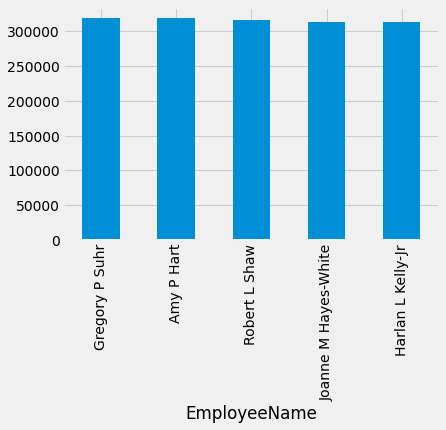

In [30]:
df["BasePay"].sort_values(ascending=False).head().plot(kind="bar")

<AxesSubplot:title={'center':'Highest Paid SF Employees'}, xlabel='EmployeeName'>

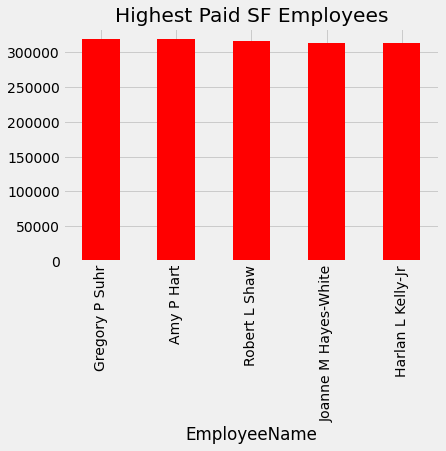

In [31]:
df["BasePay"].sort_values(ascending=False).head().plot.bar(color="red", title="Highest Paid SF Employees")

<AxesSubplot:title={'center':'Highest Paid SF Employees'}, ylabel='EmployeeName'>

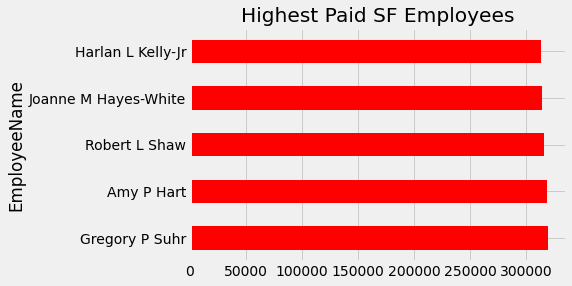

In [32]:
df["BasePay"].sort_values(ascending=False).head().plot.barh(color="red", title="Highest Paid SF Employees")

<AxesSubplot:ylabel='EmployeeName'>

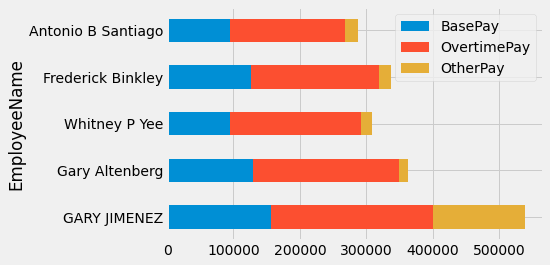

In [33]:
df.sort_values("OvertimePay", ascending=False).head().plot(kind="barh", stacked=True)

Text(0.5, 0, 'Dollars')

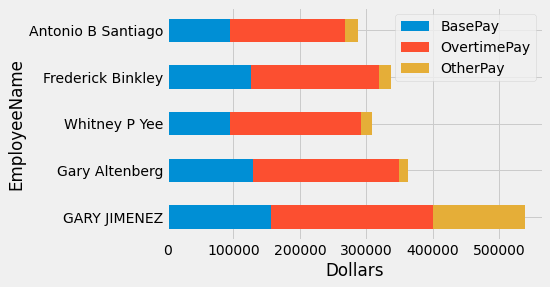

In [34]:
df.sort_values("OvertimePay", ascending=False).head().plot.barh(stacked=True)
plt.xlabel("Dollars")

### pandas histogram

<AxesSubplot:ylabel='Frequency'>

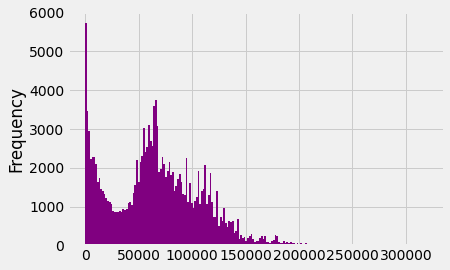

In [35]:
df["BasePay"].plot(kind="hist", bins=200, color="purple")

<AxesSubplot:ylabel='Frequency'>

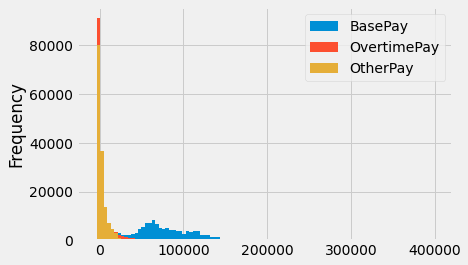

In [37]:
df.plot(kind="hist", bins=100)

array([[<AxesSubplot:title={'center':'BasePay'}>,
        <AxesSubplot:title={'center':'OvertimePay'}>],
       [<AxesSubplot:title={'center':'OtherPay'}>, <AxesSubplot:>]],
      dtype=object)

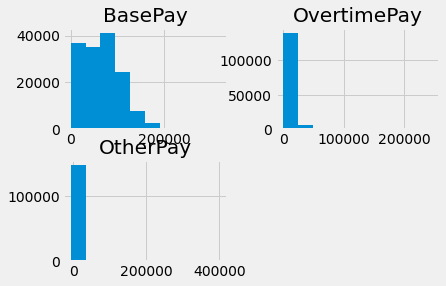

In [38]:
df.hist()

<AxesSubplot:ylabel='Frequency'>

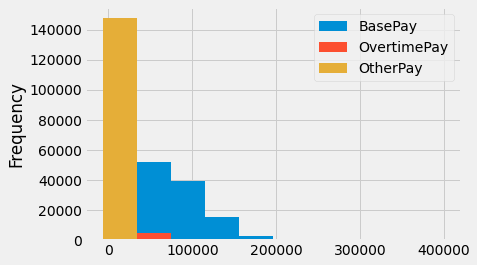

In [39]:
df.plot.hist()

## Box Plots

<AxesSubplot:>

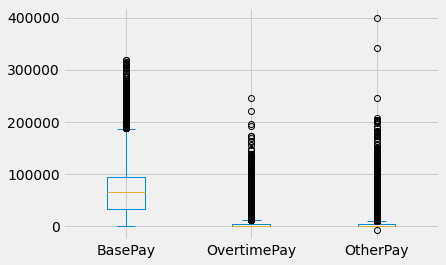

In [40]:
df.plot(kind="box")

<AxesSubplot:>

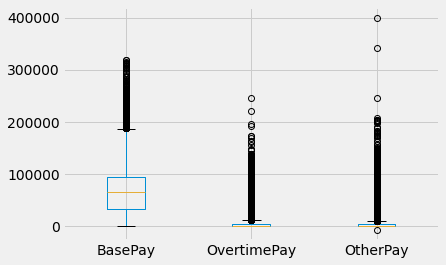

In [41]:
df.boxplot()

<AxesSubplot:>

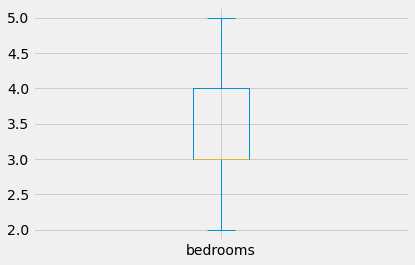

In [42]:
houses.bedrooms.plot(kind="box", showfliers=False)

<AxesSubplot:>

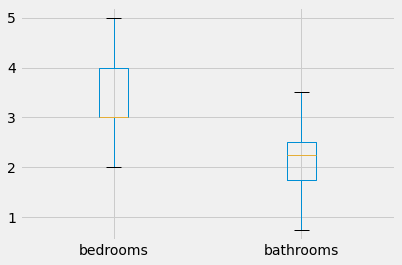

In [43]:
houses[["bedrooms", "bathrooms"]].boxplot(showfliers=False)

## Line Plots

<AxesSubplot:>

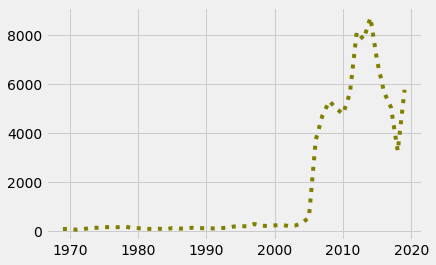

In [44]:
ufos.year.value_counts().sort_index().plot(kind="line", color="olive", linestyle=":")

## Scatter Plots

<AxesSubplot:xlabel='bedrooms'>

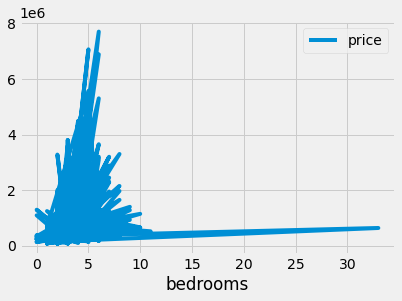

In [46]:
houses.plot.line(x="bedrooms", y="price")

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

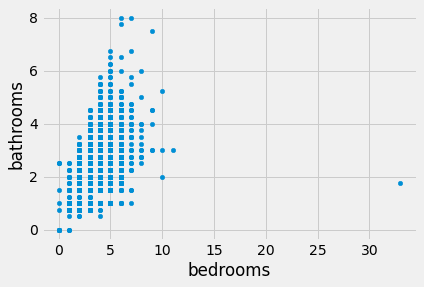

In [45]:
houses.plot.scatter(x="bedrooms", y="bathrooms")

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

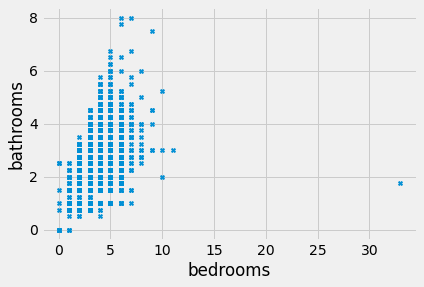

In [47]:
houses.plot.scatter(x="bedrooms", y="bathrooms", marker="X")

### multiple plots on the same axes

Text(0.5, 0, 'Year')

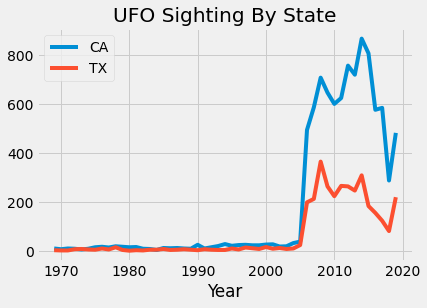

In [48]:
ufos[ufos["state"] == "CA"].year.value_counts().sort_index().plot(label="CA")
ufos[ufos["state"] == "TX"].year.value_counts().sort_index().plot(label="TX")
plt.legend(loc="upper left")
plt.title("UFO Sighting By State")
plt.xlabel("Year")

In [52]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87891 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84954 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  datetime64[ns]
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
 12  month           86938 non-null  float64       
 13  year            86938 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(8)
memory usa

Text(0.5, 0, 'Year')

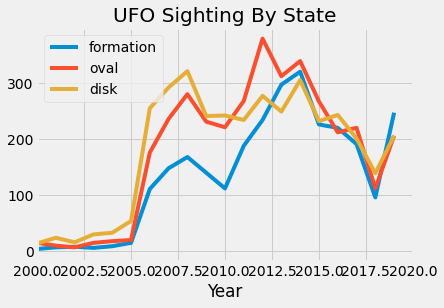

In [51]:
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")
ufos[ufos["shape"] == "oval"].year.value_counts().sort_index().plot(label="oval")
ufos[ufos["shape"] == "disk"].year.value_counts().sort_index().plot(label="disk")
plt.xlim(2000,2020)
plt.legend(loc="upper left")
plt.title("UFO Sighting By State")
plt.xlabel("Year")

### subplots

In [53]:
df

,BasePay,OvertimePay,OtherPay
EmployeeName,,,
NATHANIEL FORD,167411.18,0.00,400184.25
GARY JIMENEZ,155966.02,245131.88,137811.38
ALBERT PARDINI,212739.13,106088.18,16452.60
CHRISTOPHER CHONG,77916.00,56120.71,198306.90
PATRICK GARDNER,134401.60,9737.00,182234.59
...,...,...,...
Roy I Tillery,0.00,0.00,0.00
Not provided,0.00,0.00,0.00
Not provided,0.00,0.00,0.00


<AxesSubplot:ylabel='Frequency'>

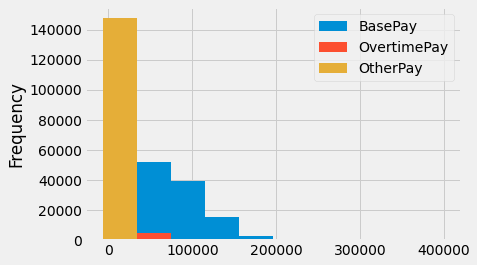

In [54]:
df.plot.hist()

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

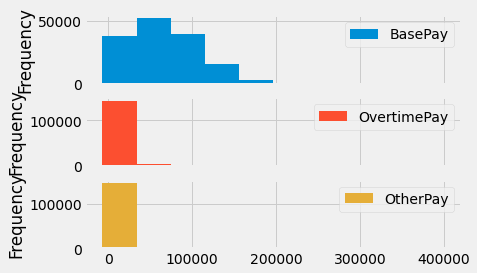

In [57]:
df.plot.hist(subplots=True)

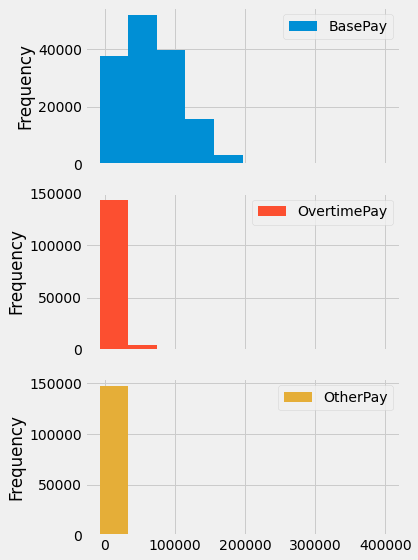

In [64]:
df.plot(kind='hist',subplots=True, figsize=(6,8))
plt.tight_layout()

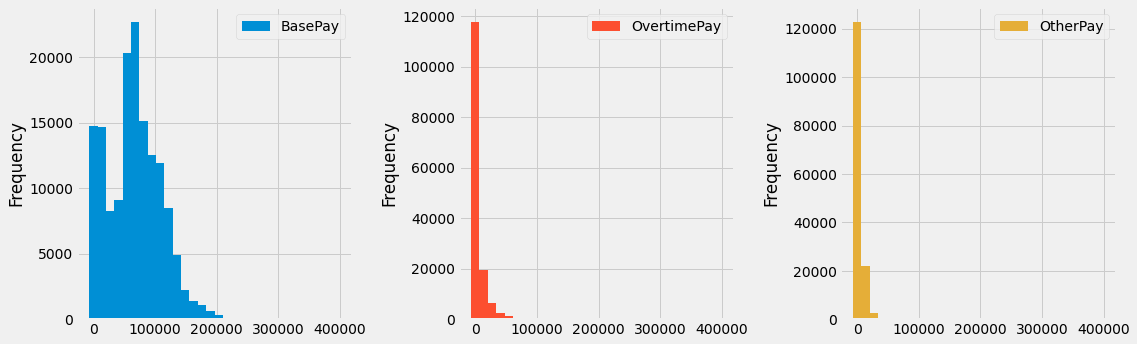

In [69]:
df.plot(kind='hist',subplots=True,sharex=False,layout=(1,3), figsize=(16,5), bins=30)
plt.tight_layout()

(0.0, 20000.0)

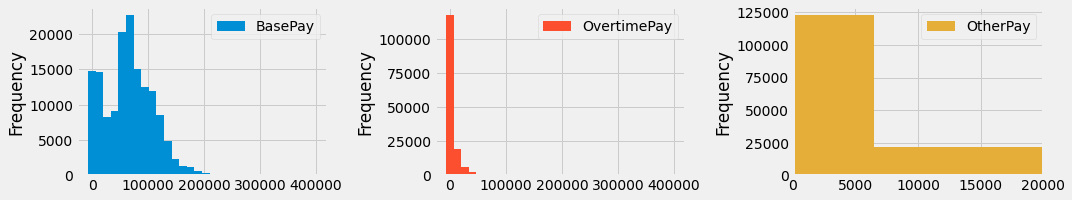

In [75]:
axes = df.plot(kind='hist',subplots=True,sharex=False,layout=(1,3), figsize=(15,3), bins=30)
plt.tight_layout()
axes[0][2].set_xlim(0,20000)

Text(0.5, 1.0, 'Right')

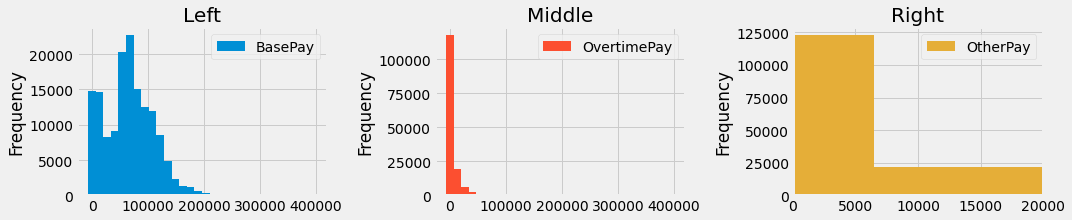

In [77]:
axes = df.plot(kind='hist',subplots=True,sharex=False,layout=(1,3), figsize=(15,3), bins=30)
plt.tight_layout()
axes[0][2].set_xlim(0,20000)
axes[0][1].set_title('Middle')
axes[0][0].set_title('Left')
axes[0][2].set_title('Right')

### manual subplots


<AxesSubplot:>

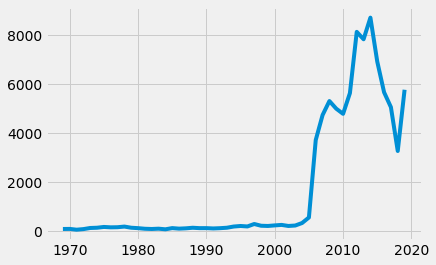

In [83]:
ufos.year.value_counts().sort_index().plot()

<AxesSubplot:>

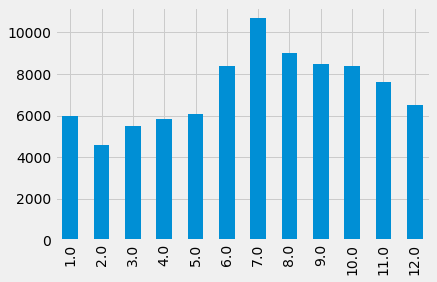

In [85]:
ufos.month.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

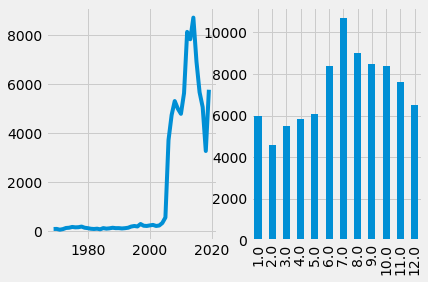

In [92]:
fiq,axs=plt.subplots(1,2)
ufos.year.value_counts().sort_index().plot(ax=axs[0])
ufos.month.value_counts().sort_index().plot(kind='bar',ax=axs[1])

Text(0.5, 1.0, 'Sighting By Month')

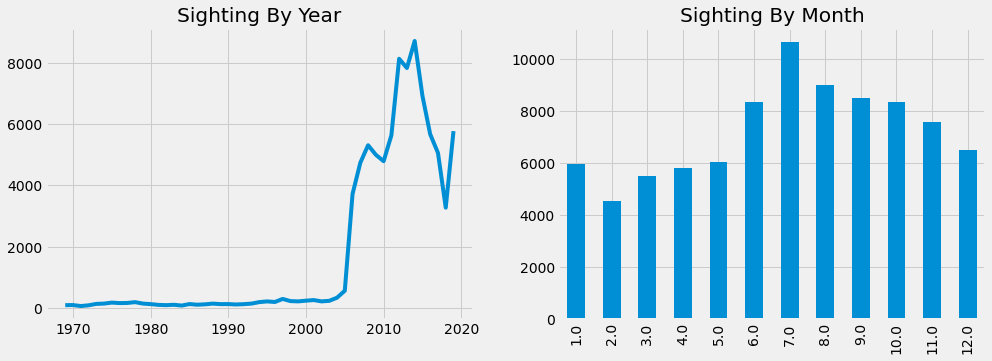

In [94]:
fiq,axs=plt.subplots(1,2)
ufos.year.value_counts().sort_index().plot(ax=axs[0],figsize=(15,5))
axs[0].set_title('Sighting By Year')
ufos.month.value_counts().sort_index().plot(kind='bar',ax=axs[1])
axs[1].set_title('Sighting By Month')

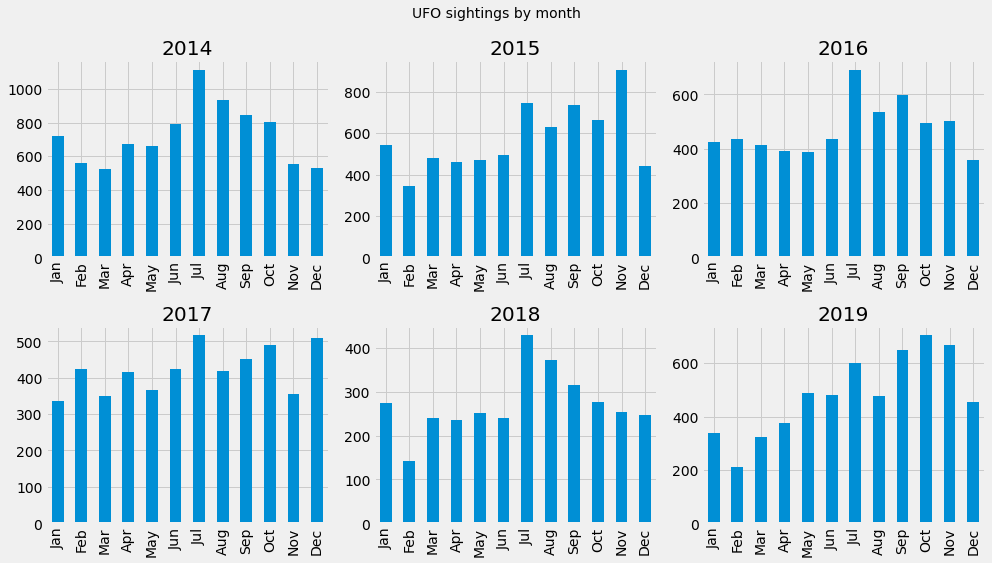

In [95]:
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
          7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("UFO sightings by month", fontsize=14)
fig.tight_layout(pad=2)
ufos[ufos.year == 2014].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][0], title="2014")
ufos[ufos.year == 2015].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][1], title="2015")
ufos[ufos.year == 2016].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][2], title="2016")
ufos[ufos.year == 2017].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][0], title="2017")
ufos[ufos.year == 2018].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][1], title="2018")
ufos[ufos.year == 2019].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][2], title="2019")
plt.tight_layout()

### exporting figures with savefig()

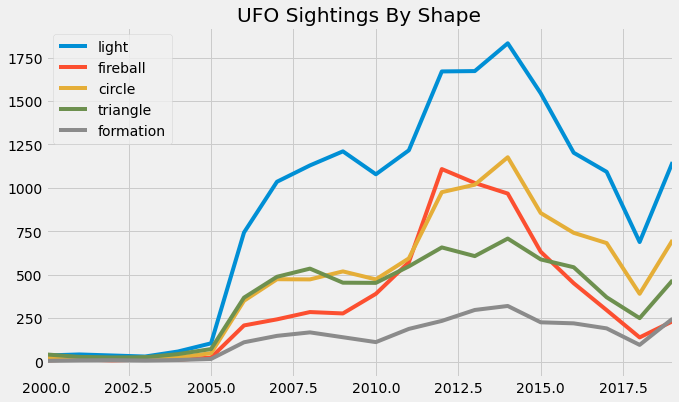

In [98]:
ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light", figsize=(10,6), title="UFO Sightings By Shape")
ufos[ufos["shape"] == "fireball"].year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"] == "circle"].year.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"] == "triangle"].year.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"] == "formation"].year.value_counts().sort_index().plot(label="formation")

plt.xlim(2000, 2019)
plt.legend()
plt.savefig("UFO_Shapes")

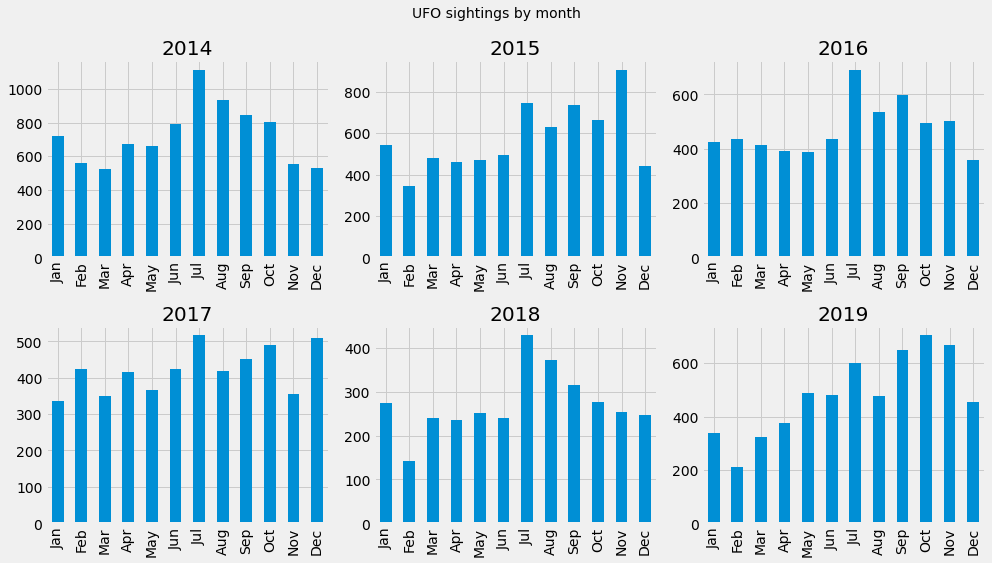

In [99]:
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
          7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("UFO sightings by month", fontsize=14)
fig.tight_layout(pad=2)
ufos[ufos.year == 2014].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][0], title="2014")
ufos[ufos.year == 2015].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][1], title="2015")
ufos[ufos.year == 2016].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[0][2], title="2016")
ufos[ufos.year == 2017].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][0], title="2017")
ufos[ufos.year == 2018].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][1], title="2018")
ufos[ufos.year == 2019].month.value_counts().sort_index().rename(months).plot(kind="bar", ax=axs[1][2], title="2019")
plt.tight_layout()
plt.savefig('UFOs_By_Month')